<a href="https://colab.research.google.com/github/bubulubii/IAyRN-2024/blob/main/Actividades/%C3%81rbol_De_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad 4:** Árbol de decisión **Alumna:** María Fernanda Ramos Campos **Matrícula:** 2109376 **Hora clase:** N4

**Descripción de la actividad:** Entrenamiento de un árbol de decisión, como modelo de aprendizaje supervisado, usando el conjunto de datos "Breast Cancer Wisconsin (Diagnostic)", para obtener diagnóstico de si se trata de tumores malignos o benignos.

In [23]:
#Importamos las librerías necesarias, así como el conjunto de datos.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [24]:
#Cargamos los datos
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [25]:
#Verificamos las etiquetas
cancer.target_names


array(['malignant', 'benign'], dtype='<U9')

In [26]:
#Preprocesamos los datos y dividimos en entrenamiento y prueba, con una relación de 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#Llamamos al clasificador de árbol de decisiones, así como seleccionamos y entrenamos el modelo.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
#Medimos la exactitud de nuestro modelo de entrenamiento, así como del de prueba.
train_accuracy = clf.score(X_train, y_train)
print('\nTrain accuracy:', train_accuracy * 100, '%')
test_accuracy = clf.score(X_test, y_test)
print('\nTest accuracy:', test_accuracy * 100, '%')


Train accuracy: 100.0 %

Test accuracy: 94.73684210526315 %


In [57]:
#Solicitamos predicciones del conjunto de datos de prueba
predictions = clf.predict(X_test)
print(predictions)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


In [59]:
#Pedimos las 5 predicciones que se nos solicitaron, verificando la eficacia de los datos de prueba.
y_pred = clf.predict(X_test)
for i in range(5):
    print('\nPredicción',[i], ':', y_pred[i], ',', y_test[i])



Predicción [0] : 1 , 1

Predicción [1] : 0 , 0

Predicción [2] : 0 , 0

Predicción [3] : 1 , 1

Predicción [4] : 1 , 1


In [60]:
#Verificamos que, efectivamente, coinciden las cinco primeras predicciones.

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy * 100, "%")

Test Accuracy: 94.73684210526315 %


In [61]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



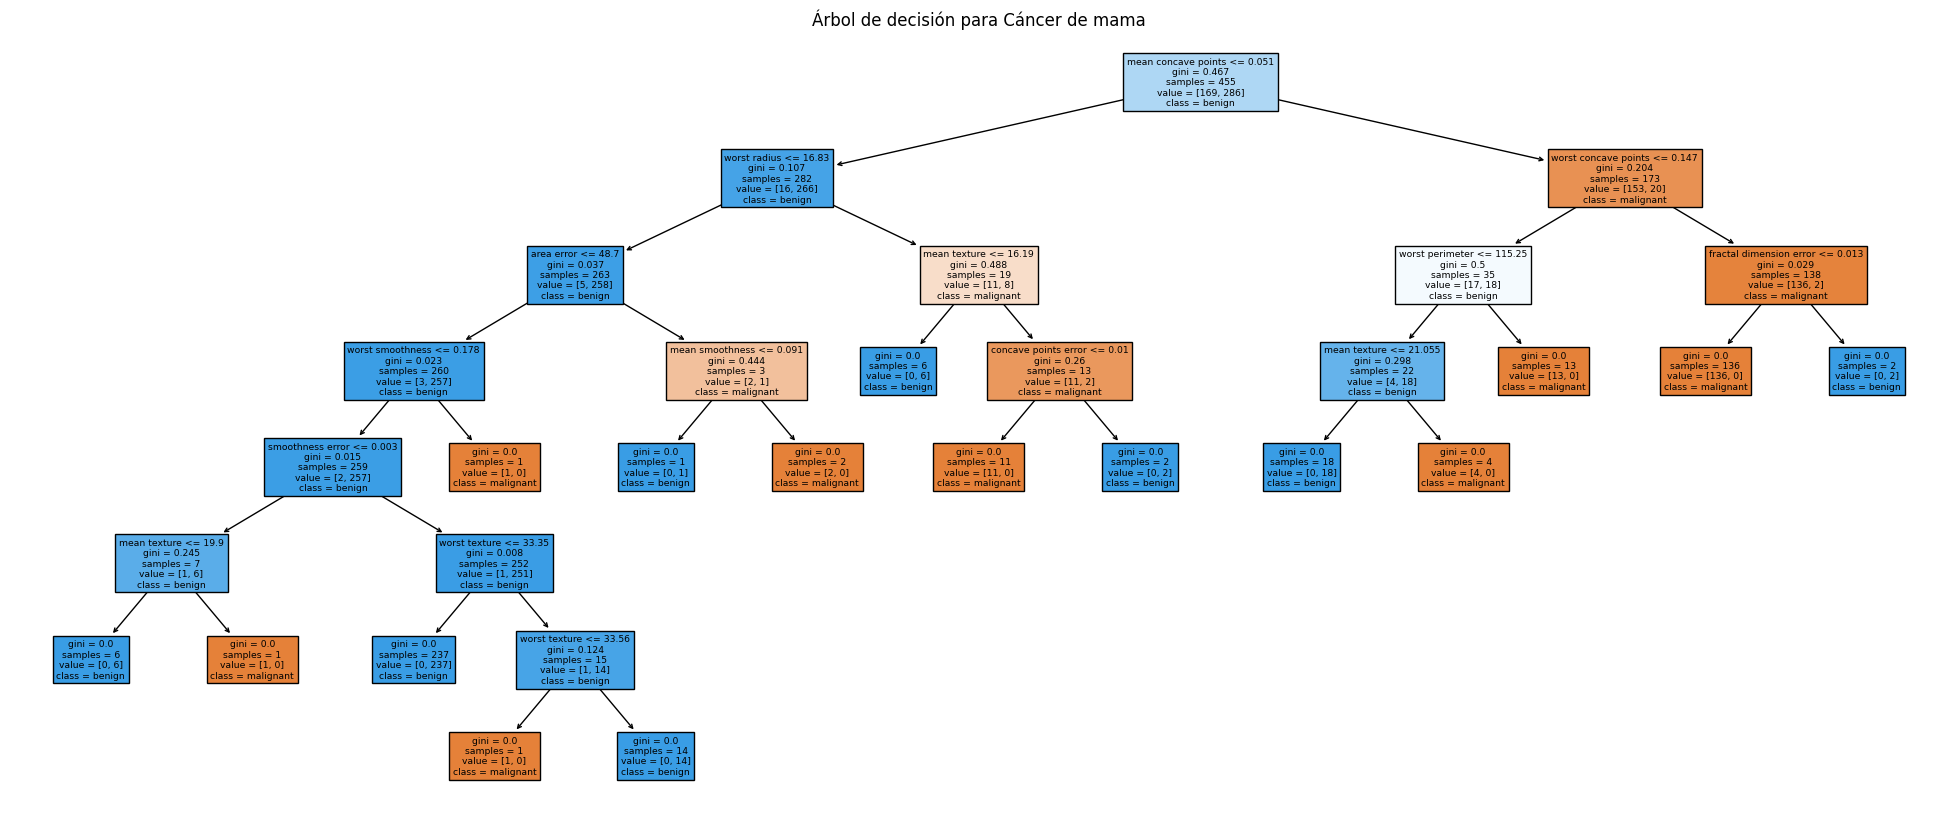

In [63]:
plt.figure(figsize=(25, 10))
tree.plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title("Árbol de decisión para Cáncer de mama")
plt.savefig("decision_tree.png", dpi=300)  # Fijamos el DPI a 300, como fue solicitado.
plt.show()
